# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [2]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv')
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [3]:
df.isna().sum()

ID                   0
Year_Birth           0
Dt_Customer          0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

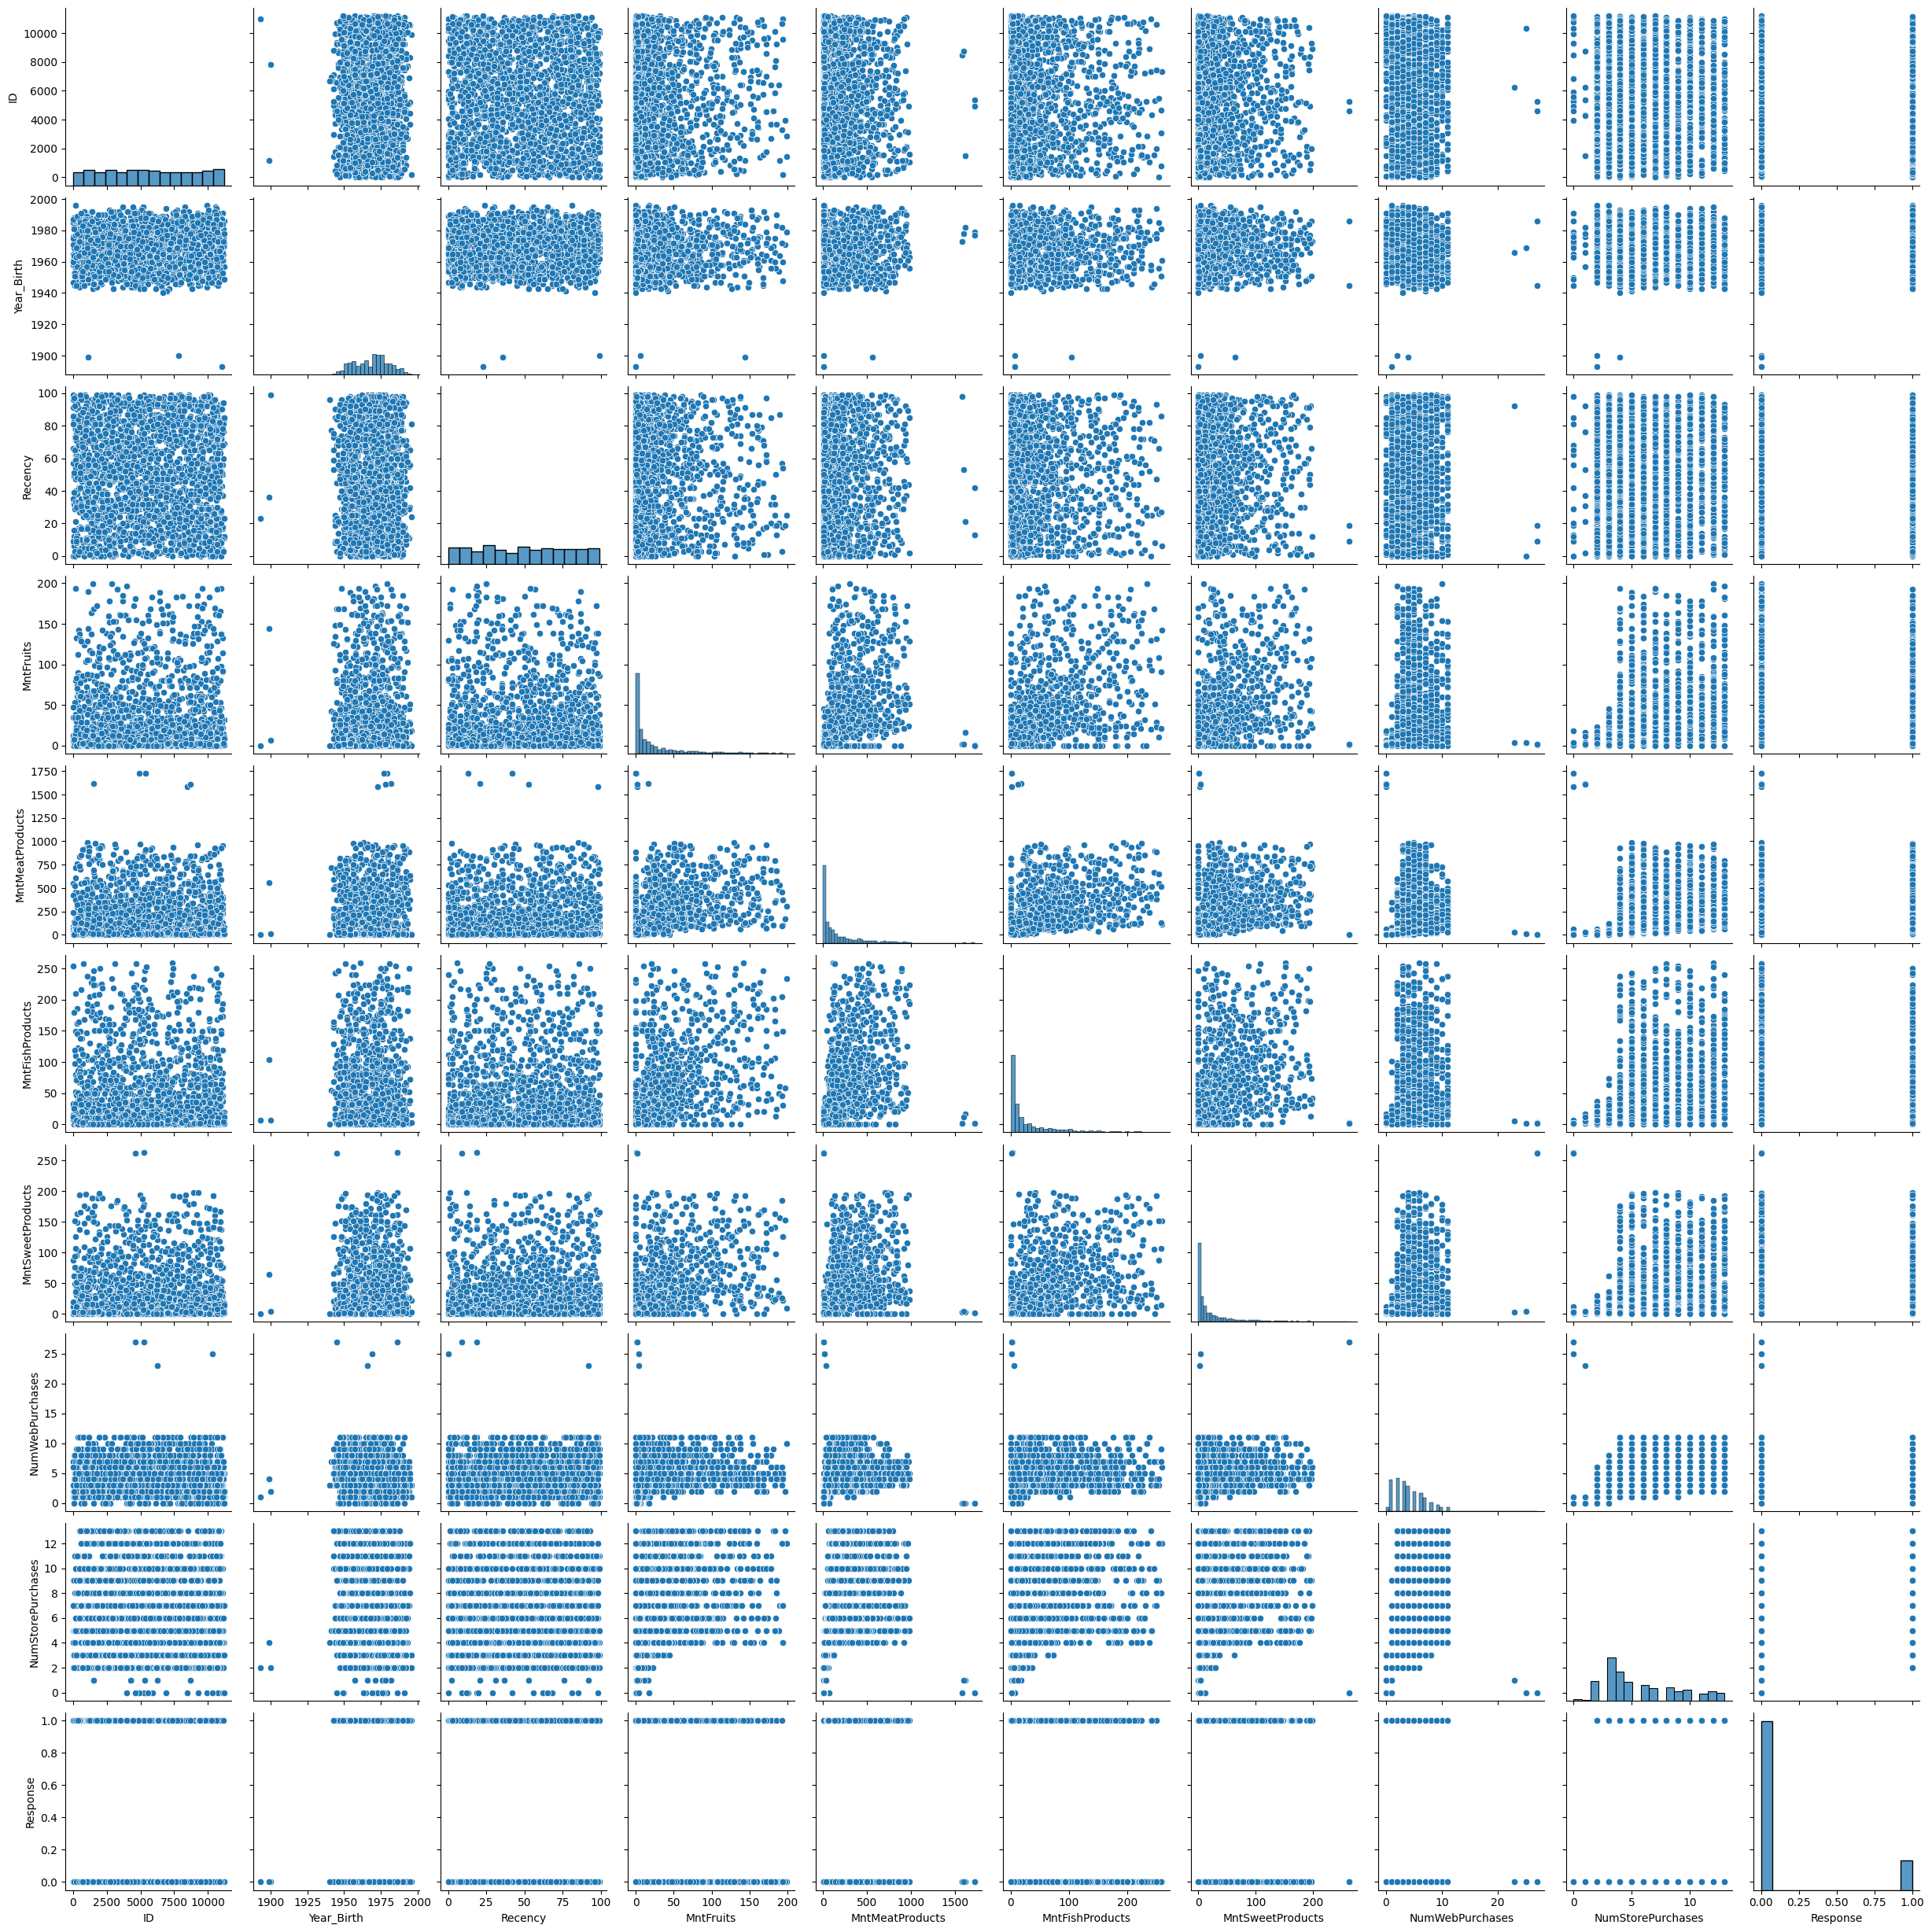

In [5]:
sns.pairplot(df)
plt.show()

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

Напишите ваш ответ ниже

Из pairplot можно положить 2-4 кластера

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

df['day_Customer'] = df['Dt_Customer'].dt.day
df['month_Customer'] = df['Dt_Customer'].dt.month

# Убираем обработанную дату и параметры не влияющие на принадлежность к кластеру
df.drop(['Dt_Customer', 'ID', 'Year_Birth'], axis=1, inplace=True)

In [7]:
df.head()

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,day_Customer,month_Customer
0,58,88,546,172,88,8,4,1,4,9
1,38,1,6,2,1,1,2,0,8,3
2,26,49,127,111,21,8,10,0,21,8
3,26,4,20,10,3,2,4,0,10,2
4,94,43,118,46,27,5,6,0,19,1


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

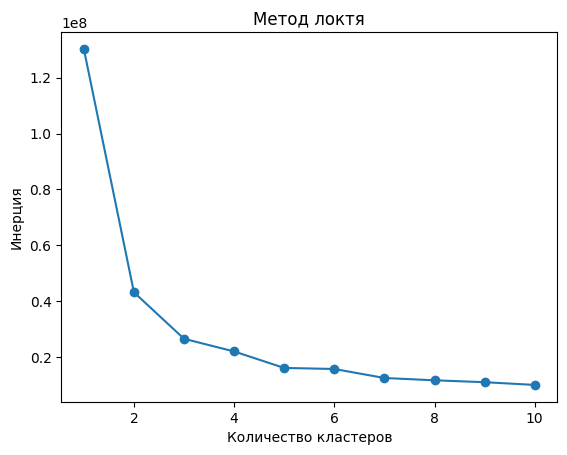

In [8]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

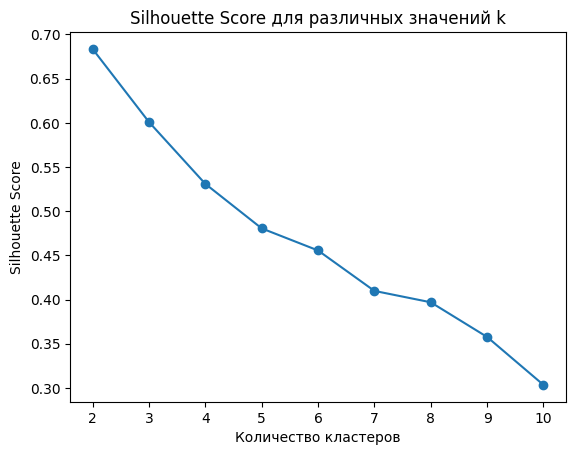

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K[1:]:  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.plot(K[1:], silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для различных значений k')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

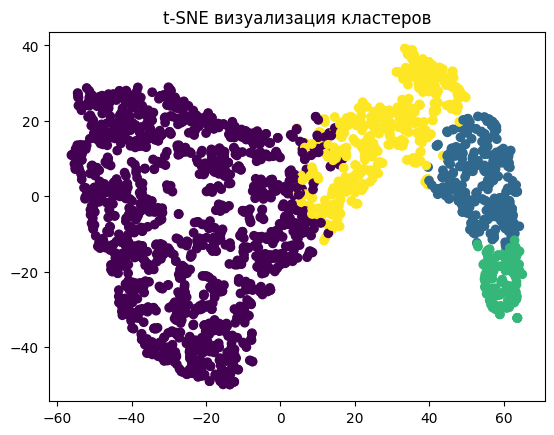

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
tsne_results = tsne.fit_transform(df)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('t-SNE визуализация кластеров')

plt.show()

# Задание 6

Постройте профили кластеров и опишите их.

In [13]:
df['Cluster'] = kmeans.labels_
cluster_profiles = df.groupby('Cluster').mean()
cluster_profiles

,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,day_Customer,month_Customer
Cluster,,,,,,,,,,
0,48.751082,6.663781,35.310967,9.109668,6.860029,3.127706,4.128427,0.101732,15.843434,6.412698
1,50.878893,64.083045,457.799308,97.605536,65.463668,5.110727,8.363322,0.238754,15.148789,6.588235
2,52.101562,72.812500,823.960938,95.835938,70.875000,5.046875,8.117188,0.421875,16.320312,6.500000
3,48.199085,49.979405,199.670481,70.837529,52.910755,6.160183,8.677346,0.160183,15.112128,6.551487


# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

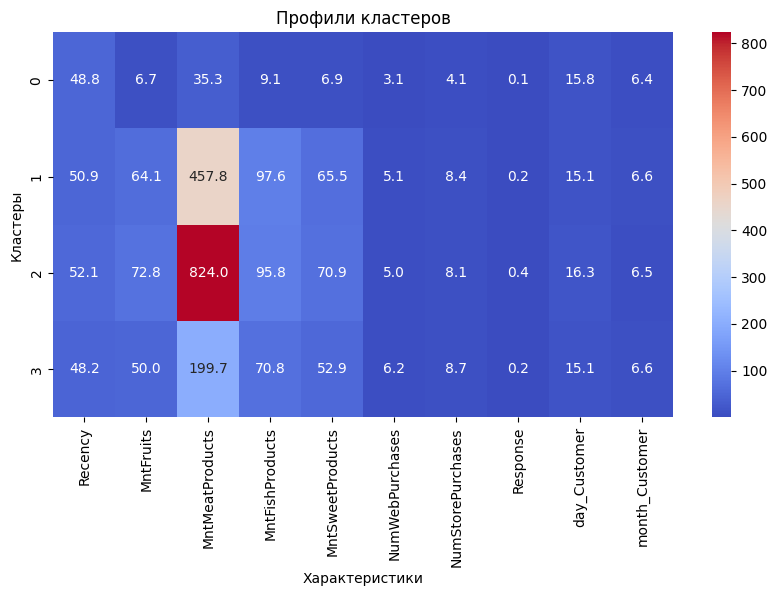

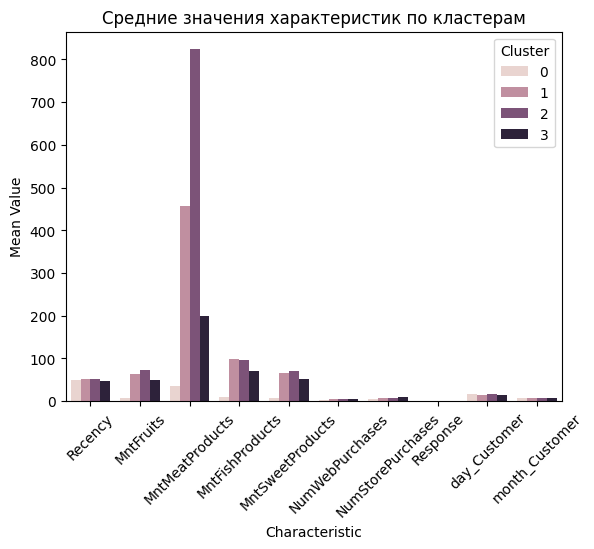

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Профили кластеров')
plt.xlabel('Характеристики')
plt.ylabel('Кластеры')
plt.show()

cluster_profiles.reset_index().melt(id_vars='Cluster').rename(columns={'variable': 'Characteristic', 'value': 'Mean Value'}) \
    .pipe((sns.barplot), x='Characteristic', y='Mean Value', hue='Cluster') \
    .set_title('Средние значения характеристик по кластерам')
plt.xticks(rotation=45)
plt.show()

Все пользователи разбиты на клсстеры по покупательной способности, в основном, по деньгам потраченым на товары, в особенности, мясо.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.